In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter
from textblob import TextBlob

nltk.download("stopwords")
nltk.download("wordnet")
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
# loading the dataset
dt = pd.read_csv("/content/financial_sentiment_data.csv")

In [4]:
# creating a copy of data
df = dt.copy()

In [5]:
dt

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
...,...,...
5837,RISING costs have forced packaging producer Hu...,negative
5838,Nordic Walking was first used as a summer trai...,neutral
5839,"According shipping company Viking Line , the E...",neutral
5840,"In the building and home improvement trade , s...",neutral


In [6]:
dt.isna().sum()

Sentence     0
Sentiment    0
dtype: int64

In [7]:
dt.shape

(5842, 2)

In [8]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


In [9]:
dt["Sentiment"].value_counts()

neutral     3130
positive    1852
negative     860
Name: Sentiment, dtype: int64

##Visualizations

In [10]:
# using bar plot for finding out the count of the sentiments

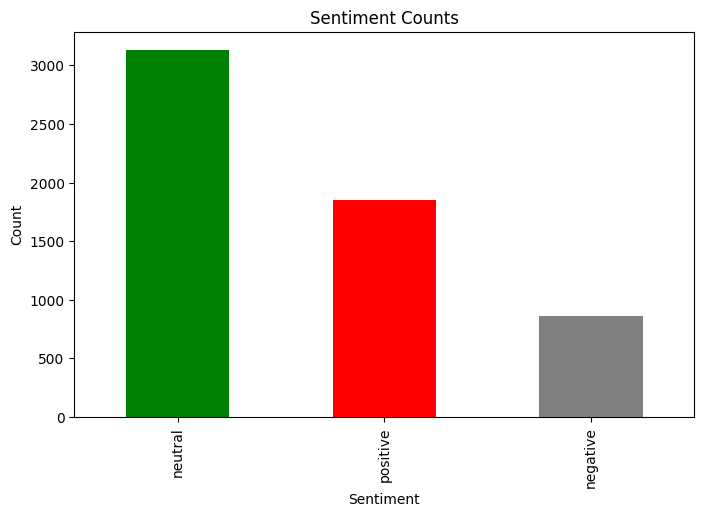

In [11]:
plt.figure(figsize=(8,5))
dt['Sentiment'].value_counts().plot(kind='bar', color=['green', 'red', 'gray'])
plt.title('Sentiment Counts')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

##Preprocessing

In [12]:
dt

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
...,...,...
5837,RISING costs have forced packaging producer Hu...,negative
5838,Nordic Walking was first used as a summer trai...,neutral
5839,"According shipping company Viking Line , the E...",neutral
5840,"In the building and home improvement trade , s...",neutral


In [13]:
#Lowercasing

In [14]:
dt["Sentence"] = dt["Sentence"].str.lower()

In [15]:
dt

,Sentence,Sentiment
0,the geosolutions technology will leverage bene...,positive
1,"$esi on lows, down $1.50 to $2.50 bk a real po...",negative
2,"for the last quarter of 2010 , componenta 's n...",positive
3,according to the finnish-russian chamber of co...,neutral
4,the swedish buyout firm has sold its remaining...,neutral
...,...,...
5837,rising costs have forced packaging producer hu...,negative
5838,nordic walking was first used as a summer trai...,neutral
5839,"according shipping company viking line , the e...",neutral
5840,"in the building and home improvement trade , s...",neutral


In [16]:
# Removing the hyperlinks

In [17]:
dt["Sentence"] = dt["Sentence"].replace(r"http\S+", '', regex=True)

In [18]:
dt

,Sentence,Sentiment
0,the geosolutions technology will leverage bene...,positive
1,"$esi on lows, down $1.50 to $2.50 bk a real po...",negative
2,"for the last quarter of 2010 , componenta 's n...",positive
3,according to the finnish-russian chamber of co...,neutral
4,the swedish buyout firm has sold its remaining...,neutral
...,...,...
5837,rising costs have forced packaging producer hu...,negative
5838,nordic walking was first used as a summer trai...,neutral
5839,"according shipping company viking line , the e...",neutral
5840,"in the building and home improvement trade , s...",neutral


In [19]:
# Removing special characters, punctuations and keeping the numbers

In [20]:
dt["Sentence"] = dt["Sentence"].replace("[^a-zA-Z0-9\s]", '', regex=True)

In [21]:
dt

,Sentence,Sentiment
0,the geosolutions technology will leverage bene...,positive
1,esi on lows down 150 to 250 bk a real possibility,negative
2,for the last quarter of 2010 componenta s net...,positive
3,according to the finnishrussian chamber of com...,neutral
4,the swedish buyout firm has sold its remaining...,neutral
...,...,...
5837,rising costs have forced packaging producer hu...,negative
5838,nordic walking was first used as a summer trai...,neutral
5839,according shipping company viking line the eu...,neutral
5840,in the building and home improvement trade sa...,neutral


In [22]:
# Now lets perform Tokenization

In [23]:
nltk.download("punkt")
dt["Sentence"] = dt["Sentence"].apply(word_tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [24]:
dt

,Sentence,Sentiment
0,"[the, geosolutions, technology, will, leverage...",positive
1,"[esi, on, lows, down, 150, to, 250, bk, a, rea...",negative
2,"[for, the, last, quarter, of, 2010, componenta...",positive
3,"[according, to, the, finnishrussian, chamber, ...",neutral
4,"[the, swedish, buyout, firm, has, sold, its, r...",neutral
...,...,...
5837,"[rising, costs, have, forced, packaging, produ...",negative
5838,"[nordic, walking, was, first, used, as, a, sum...",neutral
5839,"[according, shipping, company, viking, line, t...",neutral
5840,"[in, the, building, and, home, improvement, tr...",neutral


In [25]:
# Removing stopwords

In [26]:
stop_words = set(stopwords.words("english"))

In [27]:
dt["Sentence"] = dt["Sentence"].apply(lambda x:[word for word in x if word not in stop_words])

In [28]:
dt

,Sentence,Sentiment
0,"[geosolutions, technology, leverage, benefon, ...",positive
1,"[esi, lows, 150, 250, bk, real, possibility]",negative
2,"[last, quarter, 2010, componenta, net, sales, ...",positive
3,"[according, finnishrussian, chamber, commerce,...",neutral
4,"[swedish, buyout, firm, sold, remaining, 224, ...",neutral
...,...,...
5837,"[rising, costs, forced, packaging, producer, h...",negative
5838,"[nordic, walking, first, used, summer, trainin...",neutral
5839,"[according, shipping, company, viking, line, e...",neutral
5840,"[building, home, improvement, trade, sales, de...",neutral


In [29]:
# Now lets perform lemmatization on the tokenized data

In [30]:
# loading spacy english language model
import spacy
nlp = spacy.load("en_core_web_sm")

In [31]:
dt["Sentence"] = dt["Sentence"].apply(lambda tokens:[token.lemma_ for token in nlp(" ".join(tokens))])

In [32]:
dt

,Sentence,Sentiment
0,"[geosolutions, technology, leverage, benefon, ...",positive
1,"[esi, low, 150, 250, bk, real, possibility]",negative
2,"[last, quarter, 2010, componenta, net, sale, d...",positive
3,"[accord, finnishrussian, chamber, commerce, ma...",neutral
4,"[swedish, buyout, firm, sell, remain, 224, per...",neutral
...,...,...
5837,"[rise, cost, force, packaging, producer, huhta...",negative
5838,"[nordic, walking, first, use, summer, training...",neutral
5839,"[accord, ship, company, vike, line, eu, decisi...",neutral
5840,"[build, home, improvement, trade, sale, decrea...",neutral


In [33]:
# Now lets join the lemmatized words back into the sentence

In [34]:
dt["Sentence"] = dt["Sentence"].apply(lambda x: " ".join(x))

In [35]:
dt

,Sentence,Sentiment
0,geosolutions technology leverage benefon gps s...,positive
1,esi low 150 250 bk real possibility,negative
2,last quarter 2010 componenta net sale double e...,positive
3,accord finnishrussian chamber commerce major c...,neutral
4,swedish buyout firm sell remain 224 percent st...,neutral
...,...,...
5837,rise cost force packaging producer huhtamaki a...,negative
5838,nordic walking first use summer training metho...,neutral
5839,accord ship company vike line eu decision sign...,neutral
5840,build home improvement trade sale decrease 225...,neutral


#Visualization

In [36]:
dt.head()

,Sentence,Sentiment
0,geosolutions technology leverage benefon gps s...,positive
1,esi low 150 250 bk real possibility,negative
2,last quarter 2010 componenta net sale double e...,positive
3,accord finnishrussian chamber commerce major c...,neutral
4,swedish buyout firm sell remain 224 percent st...,neutral


In [37]:
#Pie Chart

Text(0.5, 1.0, 'Sentiment Distribution')

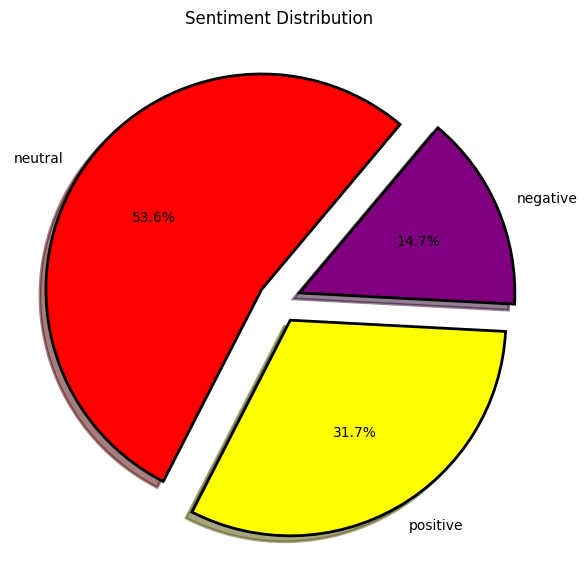

In [38]:
fig = plt.figure(figsize=(7,7))
colours = ("red","yellow","purple")
le = {"linewidth":2,"edgecolor":"black"}
tags = dt["Sentiment"].value_counts()
explode_wedge = (0.1,0.1,0.1)
tags.plot(kind="pie",autopct="%1.1f%%",shadow=True,colors = colours,startangle = 50,wedgeprops = le, explode = explode_wedge,label = "")
plt.title("Sentiment Distribution")

In [39]:
# WordCloud For Positive Sentences

In [40]:
pos_sentences = dt[dt["Sentiment"] == "positive"]["Sentence"].values

In [41]:
# we are importing this library for loading the picture
from PIL import Image

In [42]:
pic = np.array(Image.open("/content/pic.jpg"))

In [43]:
pic_wc = WordCloud(background_color="black",mask = pic)
pic_wc.generate(' '.join(pos_sentences))

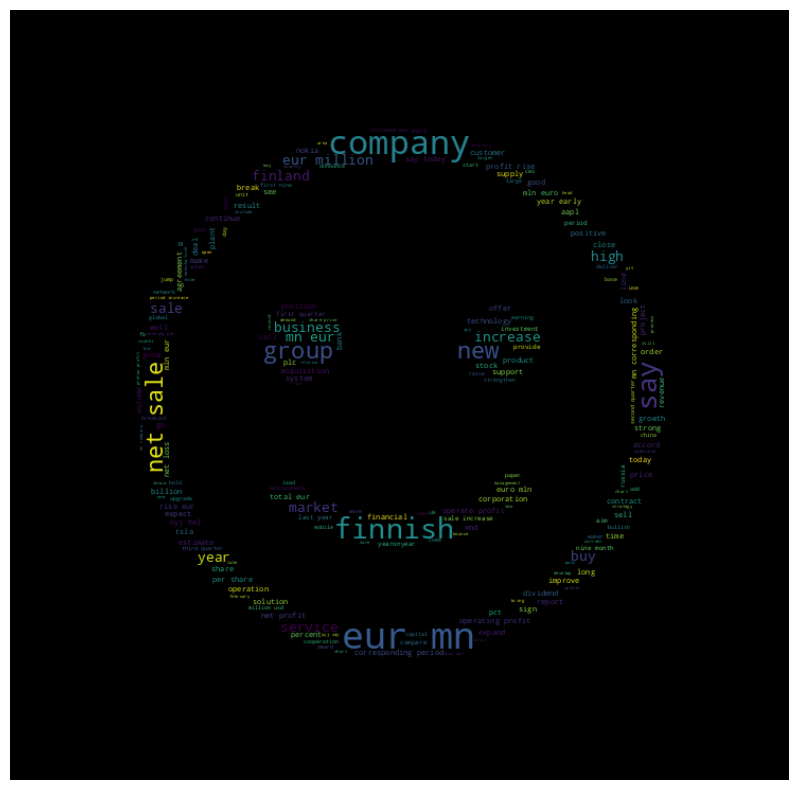

In [44]:
plt.figure(figsize=(15,10))
plt.imshow(pic_wc,interpolation="bilinear")
plt.axis("off")
plt.show()

In [45]:
# WordCloud For Negative Sentences

In [46]:
neg_sentences = dt[dt["Sentiment"] == "negative"]["Sentence"].values

In [47]:
pic1 = np.array(Image.open("/content/cartoon-sad-smile-face-emoticon-icon-in-flat-style-free-vector.jpg"))

In [48]:
pic_wc1 = WordCloud(background_color="black",mask = pic1)
pic_wc1.generate(' '.join(neg_sentences))

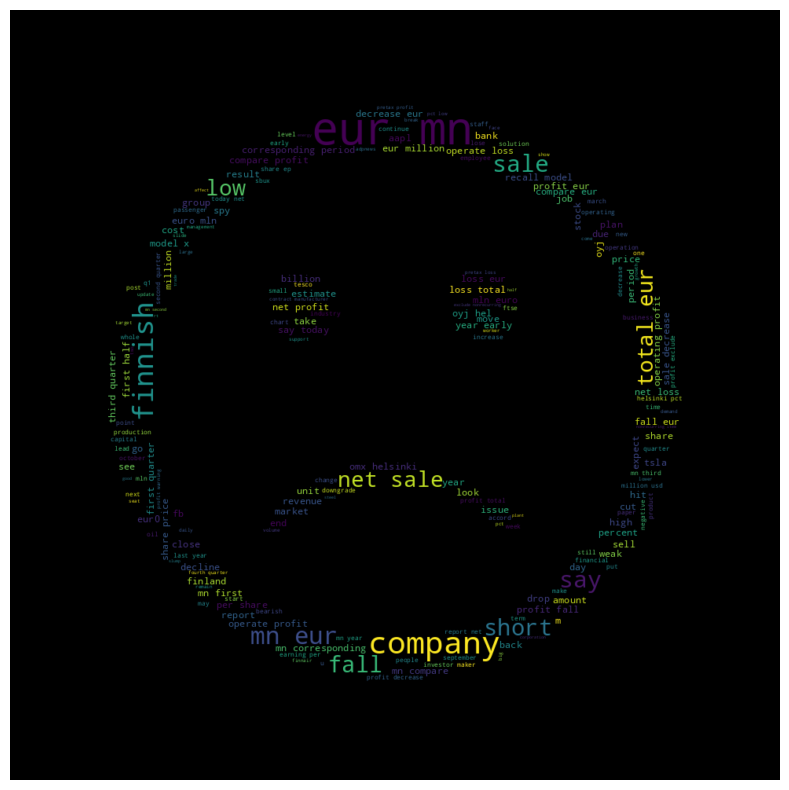

In [49]:
plt.figure(figsize=(15,10))
plt.imshow(pic_wc1,interpolation="bilinear")
plt.axis("off")
plt.show()

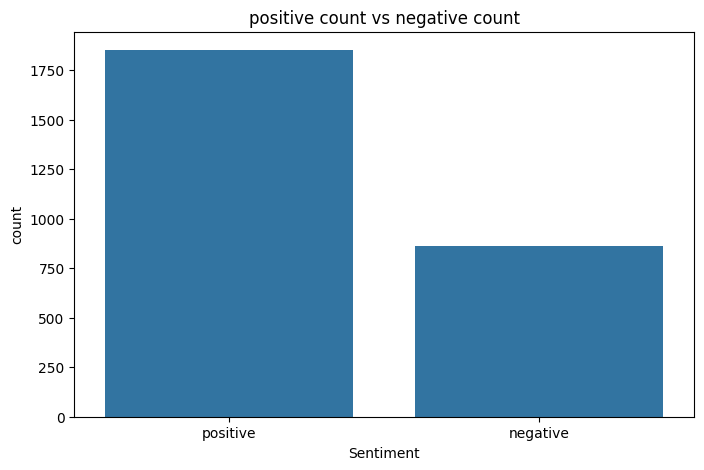

In [50]:
# count plot visualization
plt.figure(figsize=(8,5))
sns.countplot(x="Sentiment",data=dt,order=["positive","negative"])
plt.title("positive count vs negative count")
plt.show()

In [51]:
# finding out the lenght of the sentences
dt["Sentence_Length"]=dt["Sentence"].apply(len)
dt

,Sentence,Sentiment,Sentence_Length
0,geosolutions technology leverage benefon gps s...,positive,179
1,esi low 150 250 bk real possibility,negative,35
2,last quarter 2010 componenta net sale double e...,positive,122
3,accord finnishrussian chamber commerce major c...,neutral,88
4,swedish buyout firm sell remain 224 percent st...,neutral,99
...,...,...,...
5837,rise cost force packaging producer huhtamaki a...,negative,85
5838,nordic walking first use summer training metho...,neutral,66
5839,accord ship company vike line eu decision sign...,neutral,70
5840,build home improvement trade sale decrease 225...,neutral,58


In [52]:
# word count(Top 10)
from collections import Counter

In [53]:
pos_sentences = dt[dt["Sentiment"]=="positive"]["Sentence"].values
neg_sentences = dt[dt["Sentiment"]=="negative"]["Sentence"].values
neu_sentences = dt[dt["Sentiment"]=="neutral"]["Sentence"].values

In [54]:
#tokenizing sentences into words
positive_words = nltk.word_tokenize(" ".join(pos_sentences))
negative_words = nltk.word_tokenize(" ".join(neg_sentences))
neutral_words = nltk.word_tokenize(" ".join(neu_sentences))

In [55]:
# counting of occurences of each word using Counter
positive_word_cnt = Counter(positive_words)
negative_word_cnt = Counter(negative_words)
neutral_word_cnt = Counter(neutral_words)

In [56]:
# most common positive,negative and neutral words(top 10)
top_pos_words=positive_word_cnt.most_common(10)
top_neg_words=negative_word_cnt.most_common(10)
top_neu_words=neutral_word_cnt.most_common(10)
print("Most common positive words",top_pos_words)
print("Most common negative words",top_neg_words)
print("Most common neutral words",top_neu_words)

Most common positive words [('eur', 436), ('mn', 239), ('company', 232), ('sale', 229), ('say', 223), ('profit', 208), ('net', 197), ('finnish', 177), ('increase', 171), ('million', 164)]
Most common negative words [('eur', 311), ('mn', 220), ('profit', 160), ('sale', 109), ('net', 100), ('company', 89), ('finnish', 89), ('2009', 80), ('period', 80), ('fall', 79)]
Most common neutral words [('company', 595), ('eur', 537), ('share', 331), ('say', 284), ('mn', 270), ('sale', 269), ('finnish', 261), ('million', 250), ('finland', 223), ('profit', 216)]


In [57]:
# creating a subplot for visualization
positive_words, positive_counts = zip(*top_pos_words)
negative_words, negative_counts = zip(*top_neg_words)
neutral_words, neutral_counts = zip(*top_neu_words)

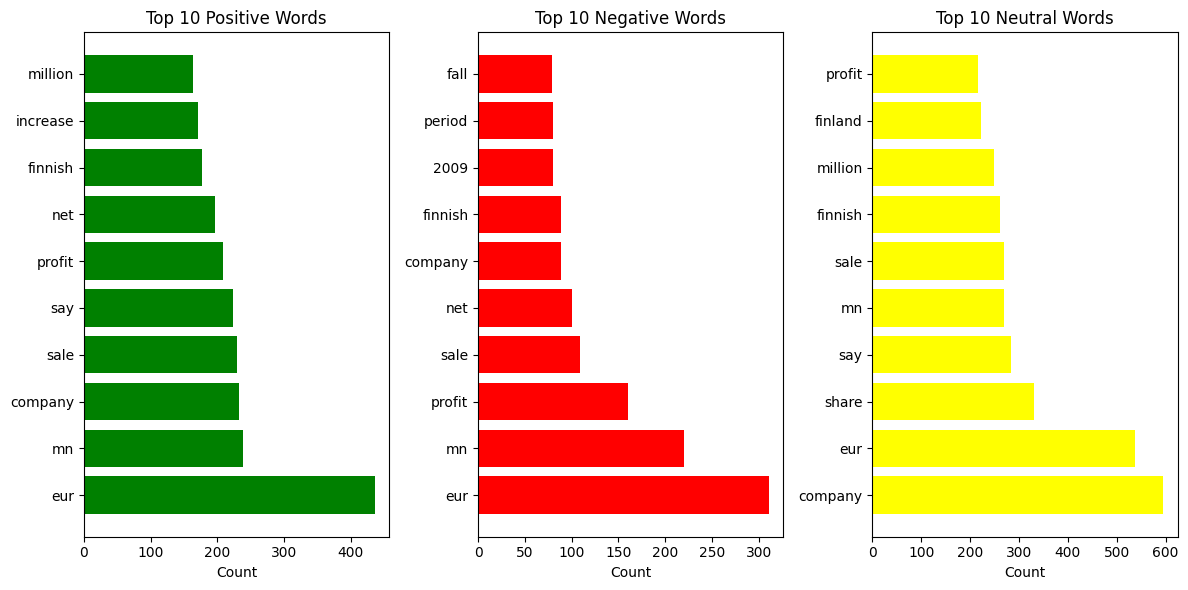

In [58]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.barh(positive_words, positive_counts, color="green")
plt.title("Top 10 Positive Words")
plt.xlabel("Count")
plt.subplot(1, 3, 2)
plt.barh(negative_words, negative_counts, color="red")
plt.title("Top 10 Negative Words")
plt.xlabel("Count")
plt.subplot(1,3,3)
plt.barh(neutral_words, neutral_counts, color="yellow")
plt.title("Top 10 Neutral Words")
plt.xlabel("Count")
plt.tight_layout()
plt.show()

In [59]:
# finding out the polarity

In [60]:
def polarity(Sentence):
  return TextBlob(Sentence).sentiment.polarity

In [61]:
dt["Polarity"] = dt["Sentence"].apply(polarity)

In [62]:
dt

,Sentence,Sentiment,Sentence_Length,Polarity
0,geosolutions technology leverage benefon gps s...,positive,179,0.007273
1,esi low 150 250 bk real possibility,negative,35,0.100000
2,last quarter 2010 componenta net sale double e...,positive,122,0.025000
3,accord finnishrussian chamber commerce major c...,neutral,88,0.062500
4,swedish buyout firm sell remain 224 percent st...,neutral,99,-0.100000
...,...,...,...,...
5837,rise cost force packaging producer huhtamaki a...,negative,85,0.000000
5838,nordic walking first use summer training metho...,neutral,66,0.250000
5839,accord ship company vike line eu decision sign...,neutral,70,0.187500
5840,build home improvement trade sale decrease 225...,neutral,58,0.000000


In [63]:
# comparing unclean and cleaned sentences
sent1 = df["Sentence"]
sent2 = dt["Sentence"]
processed = pd.DataFrame({
    "Unclean Sentences":sent1,
    "Cleaned Sentences":sent2
})
processed

,Unclean Sentences,Cleaned Sentences
0,The GeoSolutions technology will leverage Bene...,geosolutions technology leverage benefon gps s...
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",esi low 150 250 bk real possibility
2,"For the last quarter of 2010 , Componenta 's n...",last quarter 2010 componenta net sale double e...
3,According to the Finnish-Russian Chamber of Co...,accord finnishrussian chamber commerce major c...
4,The Swedish buyout firm has sold its remaining...,swedish buyout firm sell remain 224 percent st...
...,...,...
5837,RISING costs have forced packaging producer Hu...,rise cost force packaging producer huhtamaki a...
5838,Nordic Walking was first used as a summer trai...,nordic walking first use summer training metho...
5839,"According shipping company Viking Line , the E...",accord ship company vike line eu decision sign...
5840,"In the building and home improvement trade , s...",build home improvement trade sale decrease 225...


##Model Building

In [64]:
# first we have to convert all the sentences and sentiments into numeric

In [65]:
dt["Sentiment"] = dt["Sentiment"].replace(["negative","neutral","positive"],[0,1,2])

In [66]:
dt

,Sentence,Sentiment,Sentence_Length,Polarity
0,geosolutions technology leverage benefon gps s...,2,179,0.007273
1,esi low 150 250 bk real possibility,0,35,0.100000
2,last quarter 2010 componenta net sale double e...,2,122,0.025000
3,accord finnishrussian chamber commerce major c...,1,88,0.062500
4,swedish buyout firm sell remain 224 percent st...,1,99,-0.100000
...,...,...,...,...
5837,rise cost force packaging producer huhtamaki a...,0,85,0.000000
5838,nordic walking first use summer training metho...,1,66,0.250000
5839,accord ship company vike line eu decision sign...,1,70,0.187500
5840,build home improvement trade sale decrease 225...,1,58,0.000000


In [67]:
# now we will use tfidvectorizer for converting the sentences into numeric

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features=2500)

In [69]:
corpus =cv.fit_transform(dt["Sentence"]).toarray()

##Splitting the data for model Building

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
x = corpus
y = dt["Sentiment"]

In [72]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=40)
print(ytrain)

2631    1
772     1
583     1
2913    0
4201    2
       ..
4722    1
3340    1
5426    1
3064    0
3398    2
Name: Sentiment, Length: 4673, dtype: int64


##Logistic Regression Model

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

In [74]:
LR = LogisticRegression

In [75]:
# Performing hyperparameter tuning using RandomizedSearchcv

In [76]:
param_dist = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100],
    "max_iter":[50, 100, 200, 500]
}

In [77]:
# creating randomizedsearchcv object

In [78]:
random_search = RandomizedSearchCV(
    LogisticRegression(),
    param_distributions = param_dist,
    n_iter = 10,
    cv = 10,
    scoring = "accuracy",
    random_state = 42,
    n_jobs = 1
    )

In [79]:
# fitting randomizedsearchcv object to my data
random_search.fit(xtrain,ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

RandomizedSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                                        'max_iter': [50, 100, 200, 500]},
                   random_state=42, scoring='accuracy')

In [80]:
# printing the best parameters and score
print("Best Parameters :","",random_search.best_params_)
print("Best Score :","",random_search.best_score_)

Best Parameters :  {'max_iter': 100, 'C': 1}
Best Score :  0.6888486246087959


In [81]:
# finding out the score for test data
from sklearn.metrics import classification_report, accuracy_score
ypred = random_search.predict(xtest)
test_accuracy = accuracy_score(ytest,ypred)
print("Test Accuracy Score :","",test_accuracy)

Test Accuracy Score :  0.6988879384088965


In [82]:
# finding out the score for train data
best_estimator= random_search.best_estimator_
train_accuracy = best_estimator.score(xtrain,ytrain)
print("Train Accuracy Score : ",train_accuracy)

Train Accuracy Score :  0.8131821099935801


In [83]:
# lets use cross_val_score

In [84]:
from sklearn.model_selection import cross_val_score

In [85]:
cvs = cross_val_score(LogisticRegression(),x,y,cv=5,scoring="accuracy")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [86]:
print("Mean of Cross Val Score : ",cvs.mean())

Mean of Cross Val Score :  0.6910302682306619


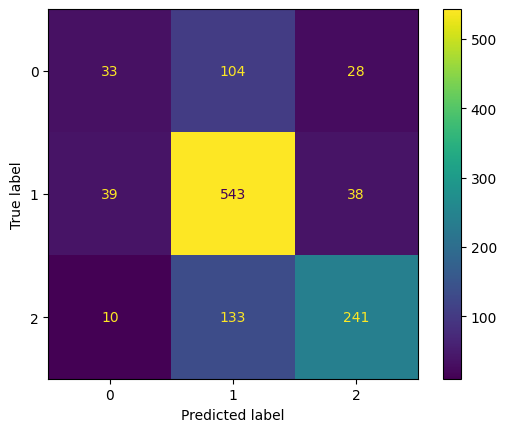

In [87]:
# Using confusion_matrix for understanding the prediction made by the model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(ytest,ypred,labels=random_search.classes_,)
display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=random_search.classes_)
display.plot()
plt.show()

##Multinomial Naive Bayes

In [88]:
from sklearn.naive_bayes import MultinomialNB
from scipy.stats import loguniform

In [89]:
NB = MultinomialNB()

In [90]:
# lets perform Hyperparameter tuning

In [91]:
# defining the parameters
params_dist = {
    "alpha" : loguniform(1e-3,1e3)# we use alpha param is smoothing param, this avoids zero probabilities for features that dont appear in training data
}

In [92]:
# creating randomsearchcv object

In [93]:
random_search1 = RandomizedSearchCV(
    NB,
    param_distributions =params_dist,
    n_iter = 10,
    cv = 5,
    scoring = "accuracy",
    random_state = 42,
    n_jobs = -1 # this specifies number of parallel jobs to run during the hyperparamter search
)

In [94]:
# fitting the randomizedsearchcv object to our data
random_search1.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=MultinomialNB(), n_jobs=-1,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f0137e4c2b0>},
                   random_state=42, scoring='accuracy')

In [95]:
# getting the best NB model
best_nb = random_search1.best_estimator_

In [96]:
ypred1 = best_nb.predict(xtest)

In [97]:
# finding out best parameters
print("Best Parameters : ",random_search1.best_params_)
print("Best Score : ",random_search1.best_score_)

Best Parameters :  {'alpha': 0.1767016940294795}
Best Score :  0.6683058319687618


In [98]:
# printing the test accuracy
accuracy = accuracy_score(ytest,ypred1)
print("Model Test Accuracy :",accuracy)

Model Test Accuracy : 0.6655260906757913


In [99]:
# finding out the train accuracy
train_pred = random_search1.predict(xtrain)
train_acc = accuracy_score(ytrain,train_pred)
print("Model Train Accuracy : ",train_acc)

Model Train Accuracy :  0.7958484913331907


In [100]:
cvs1 = cross_val_score(MultinomialNB(),x,y,scoring="accuracy",cv=5)
cvs1

array([0.68263473, 0.67322498, 0.70291096, 0.67208904, 0.67636986])

In [101]:
print("Mean of Cross Val Score : ",cvs1.mean())

Mean of Cross Val Score :  0.6814459144333641


In [102]:
# Visualization

In [103]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

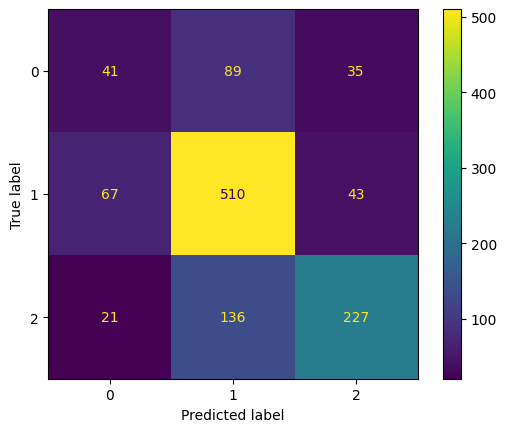

In [104]:
cm1 = confusion_matrix(ytest,ypred1,labels=random_search1.classes_)
display1 = ConfusionMatrixDisplay(confusion_matrix = cm1,display_labels = random_search1.classes_)
display1.plot()
plt.show()

##Random Forest classifier

In [105]:
x = corpus
y = dt["Sentiment"]

In [106]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()

In [107]:
# definig params

In [108]:
params_dist_ = {
    "n_estimators":[50,100,200,300], # number of trees in the forest
    "max_depth":[None,10,20,30], # max depth of the tree
    "min_samples_split":[2,5,10], # minimum number of samples requires to split an internal node
    "min_samples_leaf":[1,2,4], # Minimum number of samples required to be at a leaf node
    "max_features":["auto","sqrt","log2"],
}

In [109]:
# creating randomizedsearchcv object

In [110]:
random_search_rf = RandomizedSearchCV(
    RF,
    param_distributions = params_dist_,
    n_iter = 10,
    cv = 5,
    scoring = "accuracy",
    random_state = 42,
    n_jobs = -1
)

In [111]:
# fitting randomizedsearchcv object to our data
random_search_rf.fit(xtrain,ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 300]},
                   random_state=42, scoring='accuracy')

In [112]:
best_rf_model = random_search_rf.best_estimator_

In [113]:
ypred_rf = best_rf_model.predict(xtest)

In [114]:
# printing the accuracy of test data
accuracy_rf = accuracy_score(ytest,ypred_rf)
print("Test Accuracy : ",accuracy_rf)

Test Accuracy :  0.6826347305389222


In [115]:
# printing accuracy of train data
ytrain_rf = random_search_rf.predict(xtrain)
train_rf_acc = accuracy_score(ytrain,ytrain_rf)
print("Train Accuracy : ",train_rf_acc)

Train Accuracy :  0.7763749197517654


In [116]:
cvs2 = cross_val_score(RandomForestClassifier(),x,y,cv=5,scoring="accuracy")
cvs2

array([0.65953807, 0.64414029, 0.65839041, 0.66267123, 0.64041096])

In [117]:
print("Mean of Cross Val Score : ",cvs2.mean())

Mean of Cross Val Score :  0.6530301920620599


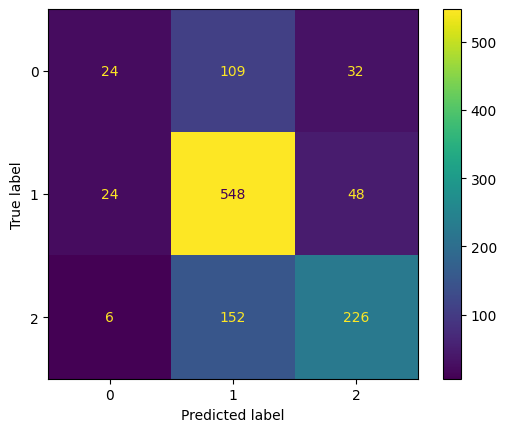

In [118]:
cm2 = confusion_matrix(ytest,ypred_rf,labels=random_search_rf.classes_)
display2 = ConfusionMatrixDisplay(confusion_matrix=cm2,display_labels=random_search_rf.classes_)
display2.plot()
plt.show()

##XGBOOST


In [119]:
from xgboost import XGBClassifier
import scipy.stats

In [120]:
xgb = XGBClassifier()

In [121]:
params_xgb = {
    "learning_rate":scipy.stats.uniform(0.01,0.3),
    "n_estimators" : [50,100,200,300],
    "max_depth" : [3,5,7],
    "subsample" : [0.8,0.9,1.0],
    "colsample_bytree" : [0.8,0.9,1,0]
}

In [122]:
random_xgb = RandomizedSearchCV(xgb,param_distributions = params_xgb,n_iter = 20,cv = 5,scoring = "accuracy",random_state= 42)
random_xgb.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=20,
                   param_distributions={'colsample_bytree': [0.8, 0.9, 1, 0],
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f0129061ab0>,
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [50, 100, 200, 300],
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=42, scoring='accuracy')

In [123]:
# best parameters for tuning
print("Best Parameters : ",random_xgb.best_params_)

Best Parameters :  {'colsample_bytree': 0.8, 'learning_rate': 0.18602534969915446, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}


In [124]:
# best model
xgb_model = random_xgb.best_estimator_
xgb_pred = xgb_model.predict(xtest)

In [125]:
xgb_acc = accuracy_score(ytest,xgb_pred)
print("XGB Test Accuracy : ",xgb_acc)

XGB Test Accuracy :  0.6569717707442259


In [126]:
# calculating the train accuracy
train_xgb = random_xgb.predict(xtrain)
xgb_train_acc = accuracy_score(ytrain,train_xgb)
print("XGB Train Accuracy : ",xgb_train_acc)

XGB Train Accuracy :  0.8097581853199229


In [127]:
# calculating the cross validation score
cv3 = cross_val_score(XGBClassifier(),xtrain,ytrain,cv=5,scoring="accuracy")
print("XGB Cross Val Score : ",cv3.mean())

XGB Cross Val Score :  0.6601765736467841


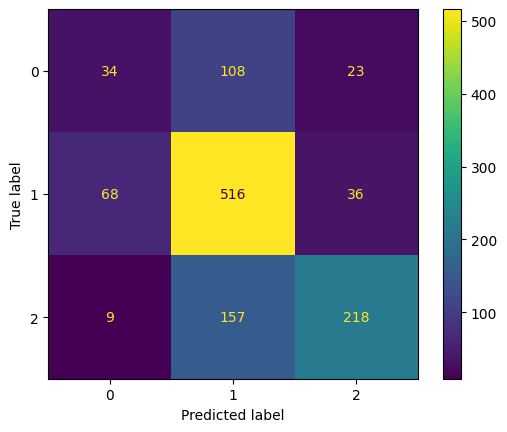

In [128]:
cm3 = confusion_matrix(ytest,xgb_pred,labels=random_xgb.classes_)
display3 = ConfusionMatrixDisplay(confusion_matrix = cm3,display_labels=random_xgb.classes_)
display3.plot()
plt.show()

## SVM

In [129]:
from sklearn.svm import SVC
svm = SVC(kernel="linear",C=0.1)

In [130]:
# Using hyperparamter tuning
svm_params = {
    "C":loguniform(1e-3,1e3),
    "kernel":["linear","rbf","poly"],
    "gamma":["scale","auto"]+list(loguniform(1e-3,1e3).rvs(10))
}

In [131]:
random_svm = RandomizedSearchCV(SVC(),param_distributions=svm_params,n_iter=20,cv=5,scoring="accuracy",random_state=42)
random_svm.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=20,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f0128f20100>,
                                        'gamma': ['scale', 'auto',
                                                  0.0165249508721783,
                                                  0.017643907408864488,
                                                  0.004353423885478279,
                                                  0.0024159710245177618,
                                                  546.4807254842761,
                                                  85.72918721382277,
                                                  0.0033914901367224155,
                                                  0.01601996833354431,
                                                  2.4077560461676675,
                                                  0.007030902083150819],
                                        'kernel': ['linear', 'rbf', 'poly']},
                   random_state=42, scoring='accuracy')

In [133]:
# best parameters
print(" Best SVM Parameters : ",random_svm.best_params_)

 Best SVM Parameters :  {'C': 0.50465608220732, 'gamma': 'auto', 'kernel': 'linear'}


In [137]:
# Test Accuracy
svm_best_model = random_svm.best_estimator_
svm_pred = svm_best_model.predict(xtest)

In [138]:
# printing the accuracy
svm_acc =accuracy_score(ytest,svm_pred)
print("SVM Test Accuracy : ",svm_acc)

SVM Test Accuracy :  0.6937553464499572


In [141]:
# train accuracy
svm_train = random_svm.predict(xtrain)
svm_train_acc = accuracy_score(ytrain,svm_train)
print("SVM Train Accuracy : ",svm_train_acc)

SVM Train Accuracy :  0.7755189385833512


In [136]:
# calculating cross val score for svm
cv5 = cross_val_score(SVC(),xtrain,ytrain,cv=5,scoring="accuracy")
print("Cross_Val_Score for SVM : ",cv5.mean())

Cross_Val_Score for SVM :  0.6623124048139793


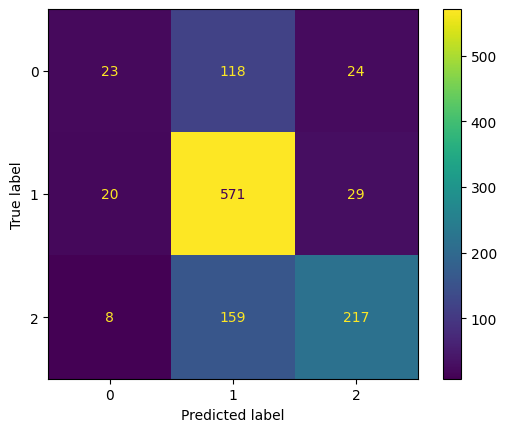

In [143]:
cm5 = confusion_matrix(ytest,svm_pred,labels=random_svm.classes_)
display4 = ConfusionMatrixDisplay(confusion_matrix = cm5,display_labels=random_svm.classes_)
display4.plot()
plt.show()

## Model summary

In [142]:
final_models = pd.DataFrame([
    {"Model":"Logistic Regression", "Train_Score":81.31, "Test_Score":69.88, "Cross_Val_Score":69.10},
    {"Model":"Naive Bayes", "Train_Score":79.58, "Test_Score":66.55, "Cross_Val_Score":68.14},
    {"Model":"Random Forest", "Train_Score":77.78, "Test_Score":68.60, "Cross_Val_Score":65.13},
    {"Model":"XGBoost","Train_Score":80.97, "Test_Score":65.69,"Cross_Val_Score":66.01},
    {"Model":"SVM","Train_Score":77.55,"Test_Score":69.37,"Cross_Val_Score":66.23}

    ])
final_models

,Model,Train_Score,Test_Score,Cross_Val_Score
0,Logistic Regression,81.31,69.88,69.10
1,Naive Bayes,79.58,66.55,68.14
2,Random Forest,77.78,68.60,65.13
3,XGBoost,80.97,65.69,66.01
4,SVM,77.55,69.37,66.23
